In [1]:
import tensorflow as tf
import os
import random
import numpy as np
import h5py
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [5]:
from google.colab import drive
drive.mount('/content/drive')
# Set the path to the folder containing .npy images
folder_path = "/content/drive/MyDrive/Deep Learning Projects/Fall_detection/data"
length = len(os.listdir(folder_path))
file_list = []
for i in range(1,(length+1)):
  element = "data"+str(i)+".npy"
  file_list.append(element)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
print(len(file_list))
# for i in file_list:
#   print(i)

54


In [10]:
#Creating an array containg all the training data
num_files = len(file_list)
height = 1000
width = 6
file_shape = (height, width)
x_training_data = np.empty((num_files,) + file_shape)
y_training_data = np.ones(num_files,np.int8) #may cause problems if not float

#print(x_training_data[40])

for i,name in enumerate(file_list):
  file_path = os.path.join(folder_path, name)
  data = np.load(file_path)
  if data[0][0]==1:
    x_training_data[i] = data[1:].T
    y_training_data[i] = 1
  if data[0][0] == 0:
    x_training_data[i] = data[1:].T
    y_training_data[i] = 0

  # print(data.shape)
  # x_training_data[i] = data.T

In [11]:
print(x_training_data.shape)

(54, 1000, 6)


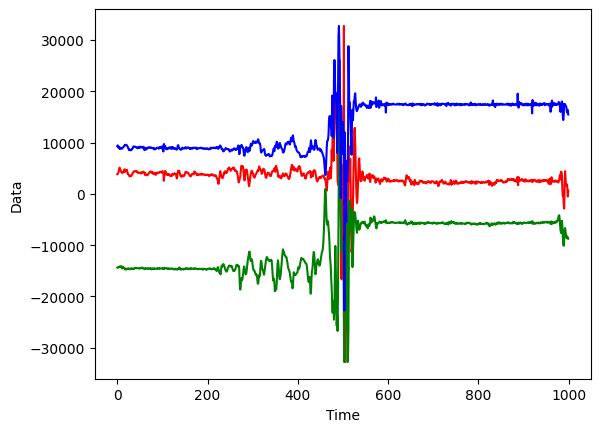

In [13]:
fig, ax = plt.subplots()
ax.set_xlabel('Time')
ax.set_ylabel('Data')
time = np.arange(0,1000,1)
elemnt = 39
ax.plot(time, x_training_data[elemnt].T[0], 'r-', label='Acc X')
ax.plot(time, x_training_data[elemnt].T[1], 'g-', label='Acc Y')
ax.plot(time, x_training_data[elemnt].T[2], 'b-', label='Acc Z')
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x_training_data, y_training_data, test_size=0.33, random_state=42) #shuffle data before this

In [41]:
print(y_test)

[1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1]


In [30]:
model = keras.Sequential([
    keras.layers.Conv1D(32, 3, activation='relu', input_shape=(1000,6)),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(64, 3, activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(128, 3, activation='relu'),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 998, 32)           608       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 499, 32)          0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 497, 64)           6208      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 248, 64)          0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 246, 128)          24704     
                                                                 
 global_average_pooling1d_2   (None, 128)             

In [32]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
model.fit(X_train, y_train, epochs=20, batch_size=30, validation_split=0.2)

Epoch 1/20
1/1 [==============================] - 0s 157ms/step - loss: 45.1072 - accuracy: 0.9643 - val_loss: 182.2792 - val_accuracy: 0.7500
Epoch 2/20
1/1 [==============================] - 0s 117ms/step - loss: 42.8628 - accuracy: 0.9643 - val_loss: 182.1513 - val_accuracy: 0.7500
Epoch 3/20
1/1 [==============================] - 0s 118ms/step - loss: 42.0389 - accuracy: 0.9286 - val_loss: 164.0571 - val_accuracy: 0.7500
Epoch 4/20
1/1 [==============================] - 0s 124ms/step - loss: 36.9208 - accuracy: 0.9286 - val_loss: 131.2917 - val_accuracy: 0.7500
Epoch 5/20
1/1 [==============================] - 0s 121ms/step - loss: 27.8548 - accuracy: 0.9286 - val_loss: 86.3927 - val_accuracy: 0.7500
Epoch 6/20
1/1 [==============================] - 0s 106ms/step - loss: 17.9682 - accuracy: 0.9643 - val_loss: 39.4087 - val_accuracy: 0.7500
Epoch 7/20
1/1 [==============================] - 0s 116ms/step - loss: 9.1228 - accuracy: 0.9643 - val_loss: 0.6756 - val_accuracy: 0.8750
Epoc

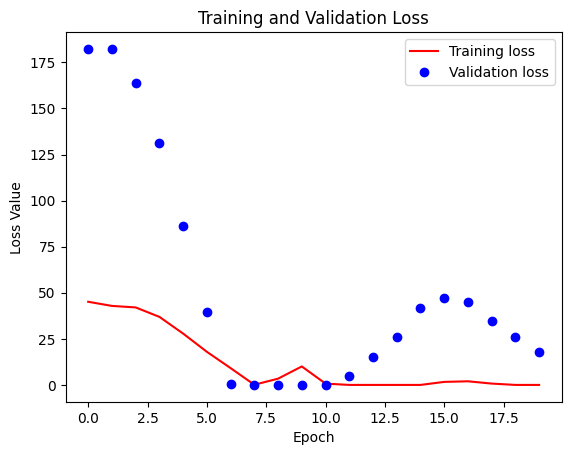

In [36]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.figure()
plt.plot( loss, 'r', label='Training loss')
plt.plot( val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
# plt.ylim([0, 1])
plt.legend()
plt.show()

In [38]:
prediction = model.predict(x_training_data)

2/2 [==============================] - 0s 18ms/step


In [40]:
for i,value in enumerate(prediction):
  print(i,value)

0 [1.]
1 [1.]
2 [1.]
3 [1.]
4 [1.]
5 [1.]
6 [1.]
7 [1.]
8 [1.]
9 [1.]
10 [1.]
11 [1.]
12 [1.]
13 [1.]
14 [1.]
15 [1.]
16 [1.]
17 [1.]
18 [1.]
19 [1.]
20 [1.]
21 [1.]
22 [1.]
23 [1.]
24 [1.]
25 [1.]
26 [1.]
27 [1.]
28 [1.]
29 [1.]
30 [1.]
31 [1.]
32 [1.]
33 [1.]
34 [1.]
35 [1.]
36 [1.]
37 [1.]
38 [1.]
39 [1.]
40 [0.]
41 [0.]
42 [0.]
43 [0.]
44 [0.]
45 [0.]
46 [0.]
47 [0.]
48 [1.]
49 [1.]
50 [4.5662567e-19]
51 [1.]
52 [1.]
53 [1.]
